# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4B - Social Impact

---

### <b> Notebook 2: Data cleaning

Structure of this notebook </b>

* Part 1. EDA - To Uncover Potential Data Issues
* Part 2. Data Cleaning - Removing Dataframe Rows that are Not Useful/Errorneous
* Part 3. Save Cleaned Dataframes as new CSV Files 
* Part 4. Obtaining Insights


---

### Import Libraries

In [2]:
# Import libraries, modules, and functions:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from nltk.tokenize import RegexpTokenizer
pd.set_option('max_colwidth', 400)

# Set random seed for document
import random
random.seed(42)

### Part 1: EDA - To Uncover Potential Data Issues

<b> (a) To import in dataset from kaggle </b>

In [3]:
# Read the dataset
df_mbti = pd.read_csv("./raw_data/mbti_8k.csv")

In [4]:
# Check info of the data
df_mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
# Check for missing values
df_mbti.isnull().sum()

type     0
posts    0
dtype: int64

**Summary:**

Visual checking of the csv file as well confirms no missing values, and in total 8675 rows of data. In addition, data type is correct as both columns involve text data.

<b> (b) To import in dataset from Linkedin </b>

In [6]:
# Read the original dataset (taken from Linkedin)
df_linkedin = pd.read_csv("./raw_data/linkedin_240.csv")

In [7]:
# Check info of the data
df_linkedin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  240 non-null    object
 1   post       240 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [8]:
# Check for missing values
df_linkedin.isnull().sum()

job_title    0
post         0
dtype: int64

**Summary:**

Visual checking of the csv file as well confirms no missing values, and in total 500????? rows of data. In addition, data type is correct as both columns involve text data.



---

### Part 2. EDA : To Uncover Potential Data Issues Requiring Cleaning

<b> For kaggle dataset </b>

Overview of Potential Data Issues Uncovered via EDA:

    - at least one '|' or brackets
    - URLS e.g. 'https://, 'www.', '.com', 'fbcdn.net'
    - HTML hexadecimal code
    - account tags '@'
    - emoji hexadecimal code and emojis
    - brackets '(',')','[',']'
    - '\r|\t|\n'
    - Enneagrams on 'type' directly followed by a number e.g. type 1
    - 'sent from my XX using tapatalk' including it's language counterparts
    - 'tmlt' - to my last tweet
    - numbers
    - gif image code
    - hashtags '#'
    - extra whitespaces

In [9]:
# Examine the dataframe
df_mbti.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I ...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (an..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. J...


In [10]:
# Lower case all the posts
df_mbti["posts"] = [post.lower() for post in df_mbti["posts"]]

<b> 1. Posts with at least one '|'

In [11]:
# Check for data in column 'posts' that contain at least one '|':
print(df_mbti["posts"].str.contains(r'\|+').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\|+') == True].head()

posts
True     8674
False       1
Name: count, dtype: int64


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7le1g4xm4 sportscenter not top ten plays https://www.youtube.com/watch?v=ucdfze1etec pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8 http://www.youtube.com/...
1,ENTP,'i'm finding the lack of me in these posts very alarming.|||sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...|||giving new meaning to 'game' theory.|||hello *entp grin* that's all it takes. than we converse and they do most of the flirting while i ...
2,INTP,"'good one _____ https://www.youtube.com/watch?v=fhigbolffgw|||of course, to which i say i know; that's my blessing and my curse.|||does being absolutely positive that you and your best friend could be an amazing couple count? if so, than yes. or it's more i could be madly in love in case i reconciled my feelings (which at...|||no, i didn't; thank you for a link!|||so-called ti-si loop (an..."
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences..."
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...


<b> 2. Posts with URL links </b>

In [12]:
# Check for data in column 'posts' that contain URLs:
print(df_mbti["posts"].str.contains(r'(https?:\/\/)?([a-z]{2,3}\.)?(\w|\-)+(\.[a-z]{2,3})(\/[\w\&\%\/\-\_\+\=\#\!\?\.\:\;\@]*)?').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'(https?:\/\/)?([a-z]{2,3}\.)?(\w|\-)+(\.[a-z]{2,3})(\/[\w\&\%\/\-\_\+\=\#\!\?\.\:\;\@]*)?') == True].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\3657461346.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_mbti["posts"].str.contains(r'(https?:\/\/)?([a-z]{2,3}\.)?(\w|\-)+(\.[a-z]{2,3})(\/[\w\&\%\/\-\_\+\=\#\!\?\.\:\;\@]*)?').value_counts())


posts
True     5961
False    2714
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\3657461346.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_mbti[df_mbti["posts"].str.contains(r'(https?:\/\/)?([a-z]{2,3}\.)?(\w|\-)+(\.[a-z]{2,3})(\/[\w\&\%\/\-\_\+\=\#\!\?\.\:\;\@]*)?') == True].head()


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7le1g4xm4 sportscenter not top ten plays https://www.youtube.com/watch?v=ucdfze1etec pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8 http://www.youtube.com/...
1,ENTP,'i'm finding the lack of me in these posts very alarming.|||sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...|||giving new meaning to 'game' theory.|||hello *entp grin* that's all it takes. than we converse and they do most of the flirting while i ...
2,INTP,"'good one _____ https://www.youtube.com/watch?v=fhigbolffgw|||of course, to which i say i know; that's my blessing and my curse.|||does being absolutely positive that you and your best friend could be an amazing couple count? if so, than yes. or it's more i could be madly in love in case i reconciled my feelings (which at...|||no, i didn't; thank you for a link!|||so-called ti-si loop (an..."
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences..."
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...


<b> 3. Posts with HTML hexadecimal codes </b>

In [13]:
# Check for data in column 'posts' that contain HTML hexadecimal codes:
print(df_mbti["posts"].str.contains(r'\&\#x\S+\;').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\&\#x\S+\;') == True].head()

posts
False    8664
True       11
Name: count, dtype: int64


,type,posts
927,INFP,"ketchup has not always been made out of tomatoes. it started out as a general term for sauce, typically made of mushrooms or fish brine with herbs and spices. mushroom ketchup is still available in...|||i was thinking about the first time i made out with a girl (7 or 8 years old) and how long its been since i've done that.|||i sometimes wish i was an isfp - but they're so close it really wou..."
1028,ENTP,"'i've posted a new track here: cbc radio 3 it's called windowshoppers' union.|||you're not a geek unless you understand that babylon 5 > deep space nine, and you can explain why.|||it's the or something. i'm starting to doubt your understanding of the idea.|||you've leapt to several silly conclusions, sellihca. i am not comforted by the neil degrasse tyson quote. it's how i live when i'm d..."
1343,INFP,"https://farm9.staticflickr.com/8645/15338044433_ae6079d512_c.jpgyoung woman in library for ielts.jpg by naomi chung&#x27;s daydream art, on flickr ...|||https://farm4.staticflickr.com/3864/15246556325_dff580594c_c.jpga junk - a chinese boat in qinzhou port by naomi chung&#x27;s daydream art, on flickr ...|||when i was little, my mother disliked i cried easily.|||i cry easily. i think i am a..."
1585,INFP,"trying to clean out my inbox, and catching up on some new posts on here.|||wish i had remembered this was coming back last night... :/|||<3 http://www.youtube.com/watch?v=iraol3pvcdi&amp;feature=share|||http://www.youtube.com/watch?v=1jj26vyf4jw&amp;feature=endscreen&amp;nr=1|||http://www.youtube.com/watch?v=182yrybxxxq&ob=av2e|||julianne hough - that song in my head - youtube|||man and his s..."
1826,INFJ,'human traffic https://www.youtube.com/watch?v=chsg0-r_jqa|||minimalism - live a meaningful life by joshua fields millburn and ryan nicodemus. i also plan on reading their book everything that remains once i finish this first one.|||https://www.youtube.com/watch?v=od_cwqgsn6c|||big picture: how to approach my gf about what's a comfortable level for her concerning physical touching. small p...


<b> 4. Posts with account tags e.g. @XXX </b>

In [14]:
# Check for data in column 'posts' that contain account tags @:
print(df_mbti["posts"].str.contains(r'@[^\s]+').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'@[^\s]+') == True].head()


posts
False    7504
True     1171
Name: count, dtype: int64


,type,posts
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...
5,INTJ,"'18/37 @.@|||science is not perfect. no scientist claims that it is, or that scientific information will not be revised as we discover new things. rational thinking has been very useful to our society....|||infp- edgar allen poe was an infp and he's in your siggy.|||people see the obvious fi and are quick to put her as infp. i agree that she has no ne. i see her as an isfp. compare her to ..."
24,ENTJ,"'still going strong at just over the two year mark. i have made noticeable changes and do not plan on slowing. i have attached my 2 year progress picture, but with my face cropped out, you know to...|||congrats fellow entj!|||thats funny, i like it. and... there may be some truth to it haha.|||i don't follow trends necessarily, although in a way we all do unless we are making our own clothing...."
27,ISFP,"'they paint without numbers|||i'd guess at istp too|||my best bud is esfp, very funny, entertaining and a big softy. he can be draining, yapping away at everything, and often it's a one way conversation with him, yap yap yap lol. would not be good to be...|||i used to smoke weed alot, everyday from morning till night for 3/4 years. it screwed my head up even when i stopped smoking it for good...."
44,INTJ,"'http://66.media.tumblr.com/fc2b6f0976361f604aafc7fe7affef4f/tumblr_inline_n6wx0loj4w1sbbi53.gif (intj)|||vaguely remember dreaming about this 18y/o kid i met recently wearing a princess peach costume (pink dress, blonde wig, etc) but he couldn't zip the back of the dress up because his shoulders were...|||nvm|||beta-adrenergic blockers block the effects of epinephrine/norepinephrine (or adren..."


<b> 5. Posts with emojis or emoji hexadecimal code </b>

In [15]:
# Check for data in column 'posts' that contain emojis:
print(df_mbti["posts"].str.contains(r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\u2600-\u26FF]|[\u2700-\u27BF]').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\u2600-\u26FF]|[\u2700-\u27BF]') == True].head()


posts
False    8552
True      123
Name: count, dtype: int64


,type,posts
83,ENTJ,"'bump|||escobar and co. escobar- entj gustavo- istx tata- isfp valleria velez(sp?) - extx fernando duque- estp law enforcement murphy- istx javier pena- estp|||charles foster kane- estp jed leland- istp bernstein- xntp susan alexander- isfp mr. thatcher- xsfx|||i always thought he was an estp with well developed fe, but i could see enxj as well.|||i always thought he was te dom, but u..."
182,INTP,'what are you? a weakling? you're just going to sit there and take that? don't be stupid. get up and do it. -esque type of motivation speech reminiscent of coaches in sports. i'll never...|||i do think your surroundings and society has an impact on how we grow to be though this contradicts the belief that your type is innate. people tend to mimic and take after others. this does not...|||my e...
189,ISTJ,"'if it's not what you expected, try browns instead :) i definitely prefer browns to blues, but everyone's different.|||in life, and particularly in your working life, you will be working with others. i would suggest accepting that you'll be working with this person, and instead concentrate more on dealing with the...|||all the ingredients for an unhealthy relationship. it all sounds so romanti..."
396,ENFP,"the enfp te bitch slap revealed this has happened to me only once or twice in my life...|||... you can't decide which load of laundry you want to do first... and this has prevented you from doing it all week.|||the waterboys - the whole of the moon https://youtu.be/pu7ar0-frro|||and suddenly you made this thread interesting... (like tequila, intx make my clothes fall off)|||of course i enj..."
411,INFJ,"'oh my goodness, thank you so much for such a lovely in-depth and personalised reply! i'm glad you like the picture :d moreover, i found the comments rather insightful, as there have been a few...|||*pokes head in and whispers* hi there; i heard there was some drawing exercise going on and i would very much like to join in so here thank you so much *drops photo of drawing and flees* ...|||ht..."


In [16]:
# Check for data in column 'posts' that contain emoji hexadecimal codes:
print(df_mbti["posts"].str.contains(r'\u200d').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\u200d') == True].head()

posts
False    8675
Name: count, dtype: int64


,type,posts


<b> 6. Posts with bracket characters </b>

In [17]:
# Check for data in column 'posts' that contain bracket characters:
print(df_mbti["posts"].str.contains(r'\(|\)|\[|\]').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\(|\)|\[|\]') == True].head()

posts
True     8363
False     312
Name: count, dtype: int64


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7le1g4xm4 sportscenter not top ten plays https://www.youtube.com/watch?v=ucdfze1etec pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8 http://www.youtube.com/...
1,ENTP,'i'm finding the lack of me in these posts very alarming.|||sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...|||giving new meaning to 'game' theory.|||hello *entp grin* that's all it takes. than we converse and they do most of the flirting while i ...
2,INTP,"'good one _____ https://www.youtube.com/watch?v=fhigbolffgw|||of course, to which i say i know; that's my blessing and my curse.|||does being absolutely positive that you and your best friend could be an amazing couple count? if so, than yes. or it's more i could be madly in love in case i reconciled my feelings (which at...|||no, i didn't; thank you for a link!|||so-called ti-si loop (an..."
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences..."
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...


<b> 7. Posts with line or tab characters

In [18]:
# Check for data in column 'posts' that contain line or tab characters:
print(df_mbti["posts"].str.contains(r'\r|\t|\n').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\r|\t|\n') == True].head()

posts
False    8675
Name: count, dtype: int64


,type,posts


<b> 8. Posts with Enneagrams on 'type' directly followed by a number e.g. type 1 </b>

In [19]:
# Check for data in column 'posts' that contain anagrams on type:
print(df_mbti["posts"].str.contains(r'\btype [0-9]{1,}( type)*').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\btype [0-9]{1,}( type)*') == True].head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\3279232603.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_mbti["posts"].str.contains(r'\btype [0-9]{1,}( type)*').value_counts())


posts
False    7856
True      819
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\3279232603.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_mbti[df_mbti["posts"].str.contains(r'\btype [0-9]{1,}( type)*') == True].head()


,type,posts
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences..."
31,INFJ,"it could be pyroluria.. you know.. it is an ongoing tension inside of you.|||love is when other people think that your man is a garbage, idiot, and dumb, ugly, bad, mean in your eyes he is still your trophy|||well then, how we will show others our existence?|||hi i just want to ask if other infjs have the guts to dominate or if no chance be submissive to others. in my case im always on the sub..."
40,ISTP,"'i got 593. from what i've read about the enneagram i'm a 953, though. i read somewhere that a lot of 9's mistype themselves as 5's.|||gtfo feeler!|||a lot of the stuff that you read in the intp descriptions applies to istps a well. like you mentioned we share a dominant function. honestly, i think that even some of the things those descriptions...|||don't worry about it. you are trying to..."
43,INFP,"'i'm type 9 and people in my family (who aren't gut-types) sometimes complain that i 'don't think'. i do feel like i don't really 'think' about certain actions-- i just do them, almost automatically....|||i relate to anne of green gables and anakin skywalker. and probably more characters that i can't think of right now. :)|||i am an incredibly slow eater. :'d it's funny, because my mum is the ..."
52,ISFJ,"'i'm currently rooting around in the forum, looking for a place to rant. i think this thread is as good as any! i have a friend who asks me to go with her to a bunch of events and stuff that i do...|||i got reformer (vdi-s). nature: 53% visionary tactics: 77% diligent energy: 68% introverted identity: supporting interesting -- thanks for bringing it to our attention, steadfast04 !|||but......"


<b> 9. Posts with 'sent from my XX using tapatalk' including it's language counterparts </b>

In [20]:
# Check for data in column 'posts' that contain 'sent from my XX using tapatalk'
print(df_mbti["posts"].str.contains(r'sent from my [\S+ ]{1,} using tapatalk').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'sent from my [\S+ ]{1,} using tapatalk') == True].head()

posts
False    8491
True      184
Name: count, dtype: int64


,type,posts
9,INTP,"'https://www.youtube.com/watch?v=w8-egj0y8qs|||i'm in this position where i have to actually let go of the person, due to a various reasons. unfortunately i'm having trouble mustering enough strength to actually pull through it. sometimes,...|||what a year, man. what a year. i am just utterly bewildered with my 20s at this point.|||my laundry. as long as i've got clothes left to wear i'm fin..."
50,INTP,"'would be interested in a detailed answer to this question also. would love to answer properly but i agree and i my view is yes, because i procrastinate every day in many areas of my life....|||i believe we are superb at being perfectionists and it causes many problems in life for me. sent from my samsung galaxy note 2|||thanks for that advice. i'm used to writing a few paragraphs, usually a..."
90,ENTP,"'i know an entj and it's everything i wanted to be. so full of purpose and the drive to execute in the best quality, but intimidating. some intjs i met are pretty cool, you can leave them be and still...|||whilst engaging in a conversation, you've already anticipated the response two words in and your mind is already drifting far ahead. if it's not according to your prediction, you multitask a..."
294,INTJ,"'...when you can't stop over analyzing things. ...when you get the question wrong, but your first answer was right, but you over analyzed again.|||i don't know about intp since the first one shouts fi, but then the person said that the cognitive functions don't match her type which is stupid, because that means she typed based off of the...|||infp there is way too much fi in you.|||ixtp|||i..."
421,ENTP,"'tell them they are right. that will make them think in their head, am i right and probably flip and agree with you. at least that's how i think, because to me it's rare that both sides aren't...|||i think of the problem, analyze available resources, thinks of what's possible, then what's not possible and why. then i come up with a solution in my mind the i know will work sent from my...|..."


In [21]:
# Check for data in column 'posts' that contain 'sent from my XX using tapatalk' in another language
print(df_mbti["posts"].str.contains(r'enviado de meu [\S+ ]{1,} usando tapatalk').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'enviado de meu [\S+ ]{1,} usando tapatalk') == True].head()

posts
False    8674
True        1
Name: count, dtype: int64


,type,posts
8224,INFJ,"'banned for talking about farts|||ah, ok. i've been offline for a while. sorry for being a dumb infj|||what supreme council? what attack? what...|||trump isn't nazi. he is only a pretty conservative!|||white girls dont exist if white guys are dead.|||they are cute, your moron! and they aren't lefitist!|||what's the song name? norude-cumstorm|||ayran- nazi bart from the simpsons|||1-yes. and..."


<b> 10. Posts with 'tmlt' - abbreviation for 'to my last tweet' </b>

In [22]:
# Check for data in column 'posts' that contain 'tmlt:
print(df_mbti["posts"].str.contains(r"tmlt").value_counts())
df_mbti[df_mbti["posts"].str.contains(r"tmlt") == True].head()

posts
False    8594
True       81
Name: count, dtype: int64


,type,posts
80,INFP,"cosmo.|||shock to honks.|||istj. tmlt be very optimistic otherwise, but listen to very pessimistic music.|||reach.|||that is true, it also happens a bit in real life we have all eight functions, we just don't use them all a lot, this is to say there are rare occasions were i seem to act more like fi than fe. it is...|||cents.|||entj. tmlt be the type of drunk to pick fights with everyone|||..."
89,INTP,"'i'm thinking that you are probably intp. a lot of your answers are nearly identical to what mine would be (and yes, i know, this is an unscientific way to confirm, but i don't have time to analyze...|||do any other intps ever get secondhand embarrassment, to the point where you can't re-watch certain parts of movies and stuff like that? for example, the office (specifically michael scott) pro..."
216,INFP,"'iei, perhaps. tmlt have the most difficult time getting over something/letting go?|||ese??? tmlt to read into everything?|||665954 are these ni eyes?|||entjs are far worse. :laughing:|||i used to be like this, too. i still try to understand where people are coming from. but i think it's resulted in me giving people way more credit than they deserve and trying to help people who...|||this i..."
253,INFP,"'ironically i am a type a.. perhaps it's because i am type 9w1.|||well to be fair, i have heard you're like a cold, emotionless robot!.|||isfj. type most likely to be an eccentric scientist|||definitely ravenclaw.. my family members have always told me i'm too curious. plus i get really into things easily o_o|||i think peeta is more likely enfj. he has a the fe to realize what is favorable for..."
428,ENFP,"'i would put contra as enfp personally. she said regarding her live debate with blair white there was a fundamental disagreement in values. right at the start of the debate, she wanted to set...|||agree on mae as isfp, been arguing for that. most of these seem really accurate. interesting note, the pastor is partially based on the creator's struggle when he was a pastor when he himself began....."


<b> 11. Posts with numbers, including shorthand decade references </b>

In [23]:
# Check for data in column 'posts' that contain numbers, including shorthand decade references:
print(df_mbti["posts"].str.contains(r'[0-9]+[s]?').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'[0-9]+[s]?') == True].head()

posts
True     8598
False      77
Name: count, dtype: int64


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7le1g4xm4 sportscenter not top ten plays https://www.youtube.com/watch?v=ucdfze1etec pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8 http://www.youtube.com/...
1,ENTP,'i'm finding the lack of me in these posts very alarming.|||sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...|||giving new meaning to 'game' theory.|||hello *entp grin* that's all it takes. than we converse and they do most of the flirting while i ...
2,INTP,"'good one _____ https://www.youtube.com/watch?v=fhigbolffgw|||of course, to which i say i know; that's my blessing and my curse.|||does being absolutely positive that you and your best friend could be an amazing couple count? if so, than yes. or it's more i could be madly in love in case i reconciled my feelings (which at...|||no, i didn't; thank you for a link!|||so-called ti-si loop (an..."
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences..."
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...


<b> 12. Posts with gif image code </b>

In [24]:
# Check for data in column 'posts' that contain gif image codes:
print(df_mbti["posts"].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)").value_counts())
df_mbti[df_mbti["posts"].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)") == True].head()

posts
False    8675
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\1481897269.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_mbti["posts"].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)").value_counts())
C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\1481897269.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_mbti[df_mbti["posts"].str.contains(r"!\[gif\]\((giphy|emote)\|\w+(\|\w+)?\)") == True].head()


,type,posts


<b> 13. Posts with hashtags </b>

In [25]:
# Check for data in column 'posts' that contain hashtags:
print(df_mbti["posts"].str.contains(r'#\S+').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'#\S+') == True].head()

posts
False    7859
True      816
Name: count, dtype: int64


,type,posts
16,INFJ,"'some of these both excite and calm me: butts bodies brains community gardens camping camping with dogs hiking with dogs chillin with animals|||i would hope that no one engages the intp's baiting and christianity 101 b.s. ...... that will go nowhere.|||i hope i am not being misunderstood. cause and effect is what gives way to life, and then the individual can apply whatever cosmic onto..."
19,INFP,"'that's normal, it happens also to me. if i am in high mood, i can act like a 478. depressed, like a 468. satisfied and relaxed, 451. but the real type of mine is 458.|||how do they say? (...) in sheep's clothing. that is the key. nobody will obey to you till you don't give them the chance to obey you without consciously knowing they are obeying you. be...|||society feels a compulsion to s..."
29,INFJ,"'i think that that can absolutely be true of infjs, and we shamefully have much potential in that department. not gonna lie, i am guilty of some unwarranted door slams, and maybe it may seem cruel at...|||a lot of people here seem to say for themselves that if they door slam someone, there is always a justifiable reason. however, to be honest, for myself i would have to say that that is not al..."
33,INFJ,"'sometimes i wonder that too.. the reason being that infj's seem so absractly deep that even being one myself i don't understand them all the time ;d|||i was wondering..|||your gf changes the curtains in your apartment and you wonder the next day has something changed.|||i only read this post of yours, but if i think this as an infj male i would have probably done the same as your boyfriend. i..."
35,INFJ,http://www.youtube.com/watch?v=ipudoucnmki http://www.youtube.com/watch?v=g9umsqrztrs http://www.youtube.com/watch?v=rjd9kv8cbeo http://www.youtube.com/watch?v=xrd4-kdlxw8|||how open you are about your feelings: very open and honest perhaps a little to open. i try to not share the negative ones but over time they tend to come out to. avoid comfrontation with your...|||http://www.youtube....


<b> 14. Posts with extra whitespaces </b>

In [26]:
# Check for data in column 'posts' that contain extra whitespaces:
print(df_mbti["posts"].str.contains(r'\s{2,}').value_counts())
df_mbti[df_mbti["posts"].str.contains(r'\s{2,}') == True].head()

posts
True     8649
False      26
Name: count, dtype: int64


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7le1g4xm4 sportscenter not top ten plays https://www.youtube.com/watch?v=ucdfze1etec pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8 http://www.youtube.com/...
1,ENTP,'i'm finding the lack of me in these posts very alarming.|||sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...|||giving new meaning to 'game' theory.|||hello *entp grin* that's all it takes. than we converse and they do most of the flirting while i ...
2,INTP,"'good one _____ https://www.youtube.com/watch?v=fhigbolffgw|||of course, to which i say i know; that's my blessing and my curse.|||does being absolutely positive that you and your best friend could be an amazing couple count? if so, than yes. or it's more i could be madly in love in case i reconciled my feelings (which at...|||no, i didn't; thank you for a link!|||so-called ti-si loop (an..."
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences..."
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...


**Summary:**

Areas to clean in Part 3:

Replacing with ' ':
> - at least one '|'
> - URLS e.g. 'https://, 'www.', '.com'
> - HTML hexadecimal code
> - account tags '@'
> - emojis
> - 'x92' - represent unicode for " ' " after iterations of EDA
> - brackets '(',')','[',']'
> - Enneagrams on 'type' directly followed by a number e.g. type 1
> - 'sent from my XX using tapatalk' including its multiple language counterparts (identified after iterations of EDA)
> - 'tmlt' - to my last tweet
> - numbers
> - 'id' and 'ive' - showing up as high count in posts after iterations of EDA
>    - assessed as non-meaningful as they are similar to stopwords but without the punctuation
> - punctuations except apostrophes in word (hashtags will be removed here)

Others:
> - standardising all apostrophes to "'"
> - remove extra whitespaces
> - remove apostrophes in start and end of string
> - check for empty strings


---

### Part 3. Data Cleaning : Removing Dataframe Rows that are Not Useful/Errorneous

- We will clean up the rows with the observations mentioned in Part 2, such as clean up rows that contain non alphabetical characters, remove punctuation, remove numbers and remove whitespaces

- We will create multiple functions to do specific tasks (as mentioned in Part 2 Summary) and then subsequently a "wrapper" function to process all of them simultaneously

- Same process will be applied to the linkedin dataset where relevant

<b> (a) To clean the dataset from kaggle </b>

In [27]:
# to remove at least one |
def remove_lines(text):
    nonalpha_regex =r'\|+'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove urls
def remove_urls(text):
    nonalpha_regex =r'(https?:\/\/)?([a-z]{2,3}\.)?(\w|\-)+(\.[a-z]{2,3})(\/[\w\&\%\/\-\_\+\=\#\!\?\.\:\;\@]*)?'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove html hexadecimal
def remove_htmlhex(text):
    nonalpha_regex =r'\&\#x[A-F0-9]+\;'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove account tags
def remove_tags(text):
    nonalpha_regex =r'@[^\s]+'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove emojis
def remove_emoji(text):
    nonalpha_regex =r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\u2600-\u26FF]|[\u2700-\u27BF]'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to replace "x92" with "'"
def remove_tags(text):
    nonalpha_regex =r'x92'
    text = re.sub(nonalpha_regex, "\'", text) 
    return text    

# to remove brackets
def remove_brackets(text):
    nonalpha_regex =r'\(|\)|\[|\]'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove type anagrams
def remove_types(text):
    nonalpha_regex =r'\btype [0-9]{1,}( type)*'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove 'sent from XX using tapatalk'
def remove_tapatalk(text):
    nonalpha_regex =r'sent from my [\S+ ]{1,} using tapatalk'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove 'tmlt'
def remove_tmlt(text):
    nonalpha_regex =r'tmlt'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove numbers
def remove_numbers(text):
    nonalpha_regex =r'[0-9]+[s]?'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove 'id'
def remove_id(text):
    nonalpha_regex =r'\b(?<!\w)id\b'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove 'ive'
def remove_ive(text):
    nonalpha_regex =r'\b(?<!\w)ive\b'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to remove punctuations except apostrophes
def remove_punctuation(text):
    nonalpha_regex =r'[^a-zA-Z0-9\'\’\′\ʼ\s]'
    text = re.sub(nonalpha_regex, " ", text) 
    return text

# to standardise apostrophes
def replace_aprostophe(text):
    nonalpha_regex =r'[\’\′\ʼ]'
    text = re.sub(nonalpha_regex, "\'", text) 
    return text

# to remove whitespace
def remove_whitespace(text):
    return " ".join(text.split())

# to remove ' at start and end of string
def remove_quotes(text):
    return re.sub(r"^'|'$", "", text)

In [28]:
# Combine all function into a "wrapper" function in the specified order

def text_preprocessor(text): 
    processed = remove_lines(text)
    processed = remove_urls(processed)
    processed = remove_htmlhex(processed)
    processed = remove_tags(processed)
    processed = remove_emoji(processed)
    processed = remove_brackets(processed)
    processed = remove_types(processed)
    processed = remove_tapatalk(processed)
    processed = remove_tmlt(processed)
    processed = remove_numbers(processed)
    processed = remove_id(processed)
    processed = remove_ive(processed)
    processed = remove_punctuation(processed)
    processed = replace_aprostophe(processed)
    processed = remove_whitespace(processed)
    processed = remove_quotes(processed)
   
    return processed 

In [29]:
# to test with one sentence from our dataset
sentence = "http://66.media.tumblr.com/fc2b6f0976361f604aafc7fe7affef4f/tumblr_inline_n6wx0lOJ4W1sbbi53.gif (INTJ)|||Vaguely remember dreaming about this 18y/o kid I met recently wearing a Princess Peach costume (pink dress, blonde wig, etc) but he couldn't zip the back of the dress up because his shoulders were...|||nvm|||Beta-adrenergic blockers block the effects of epinephrine/norepinephrine (or adrenaline, like the dude above said). Epi typically initiates responses from the sympathetic nervous system (the fight...|||Hah. So do I.|||What about Kanda from d.gray man? He strikes me as istp. Been a while since I read the manga though.|||Can a few INTPs post some funny gifs? I want to see what you think is funny.|||http://thoughtcatalog.files.wordpress.com/2013/06/when_someone_posts_gif_that_loops_right_its_true_1c9129_3799967.gif|||Ya called? Or just practicing?|||Such an old thread.   I have two younger siblings that annoy the hell out of me, but I'm pretty protective over them, specifically my sister. I always make fun of her but I suppose she's the...|||Post a smirk for me. We are going to start a contest.|||Aww, c'mon. It was just an innocent grin. I'm not encouraging churlish behavior.   http://media.tumblr.com/tumblr_m28zqld88R1r9413r.gif|||https://31.media.tumblr.com/8ec21f8c2b3263c53ab542e2c813ddc7/tumblr_inline_nbjhxzKuBr1s5tg40.gif|||Sorry, babe. I'm pretty shallow.|||I like cheese and most people can't handle too much of me, thus.  Also, z's are cool and whatnot.|||Cool cool. We can collab but I'm going to have to stream line the process. The ENTP thread was a little messy. And we need to get people to join.   DesertWind You alive, bruh? I need you.|||Do you count yourself as having won the argument with the INFJ on here? Lol|||Life. All the fun stuff.|||I love hearing ISTPs' reasons for things.|||Perhaps we should start an INTJ smirk-off?   I only wonder if we'd have enough participants. Also, we might kill the internet with sexy so I ain't too sure.|||Ditch the INFJs and ESTPs and come to the dark side :wink:  u200bBtw, I'm super tired and don't know why I'm writing this. And it's funny to see ESTPs and INFJs argue.|||It was cold. So cold. I clutched my shawl to my chest and stumbled in the dark, using the wall to guide me. The hardwood wasn't too comfortable against my bare feet.   I reached the end of the...|||Likewise.  http://img.pandawhale.com/post-23470-Jeremiah-Johnson-nod-cropped-g-jtcK.gif|||Pshhh.    But, thanks. It's a good pick me up.|||Oh, wow. I totally didn't notice that there.   I was asking because your speech patterns seem slightly off to me. Or maybe it's just the way you type.  You don't need to read so much into things. ...|||Dude. This is so old I don't remember what it's about. (and I'm too lazy to go through this thread)  Also where are you from?|||I think politik is ridiculous, in general. Unfortunately, I find I need to know the bases for it as I live in the real world.|||I don't think it's that odd. It's obviously not a competition but I have the same urge to outgive. This also currently bothering me because somebody gave me a gift and I can't think of anything to...|||I have come at your calling, young padawan.     One would say I love you, or maybe not for an INTJ. We would take care of the someone that is loved, would like to spend time with them, and,...|||That one time I'll feel content with everything.  http://replygif.net/i/740.gif|||Lol. Perfect.  This is the only one I can agree with.     I like everybody as long as they respect me and my space, screw the types. That being said, I love being arounf ENTXs :crazy:|||February 28, my friends. Bon appetit.    http://www.youtube.com/watch?v=Y1LzcS7Db68&amp;feature=youtu.be Love when Hannibal gets a little rough.|||I think seeded would be more fitting because at first you think you have something sweet and then there's something hard in your mouth.|||The ISTJs I know are like watermelons. Hard skin on the outside, but all squishy and watery on the inside, so that when I cut into them, I can drink their insides.   >They're adorable, soft people.|||http://inkslingerblog.files.wordpress.com/2013/08/clint-nod.gif  You ENTJs have my respect.   I love seeing things get done. (because I'm too lazy to actually do it)|||I only know one ISFJ personally and he acts a lot different outside than he does at home so it's hard to tell his preferences. However, he seems to enjoy dom Se and Ne users. He has a such a troll-y...|||I definitely acted like an ESFP/ENTJ as child. Bossy, loud, acting before I could think. That was always reined in by my shyness though. As a child, I didn't think about much more then getting my way...|||Ah, this is perfect. INTJs, at least in my experience, are problem solvers. The reason we usually try to figure is not just to understand, but to fix it as well. (assuming there was some problem)  ...|||Questions for you:  How often, if ever, do you get emotional? How do you react when: -emotional?  -particularly when you're offended? -the person that offended/upset you is somebody you care...|||Stop being scared of me.:dry:|||Hola.  Nice of you to pop by.|||INFJ meat is my favorite ;)   Be careful around these  parts. It's a scary place.  http://www.yserasdaughter.com/wp-content/uploads/2012/07/Its_dangerous_to_go_alone_Take_this.jpg|||Howdy do there, ESFP. I don't see many of your type around the forums.   Welcome to the cafe and have a nice stay.|||I was just actually about to, perhaps in a few days, research this topic. So thank you. I now have some semblance of how to order Starbucks.|||http://i907.photobucket.com/albums/ac280/cheezecircle/920b034098_zps27669f50.jpg I find this attractive.|||I found 2 in my bedroom last night, huge ones. I couldn't resist the urge to kill them but they gave me anxiety problems. Then I found a #$@% centipede.  Stray_Arrow hold me. :crying:|||damn sun.|||You look like such a betch with your stupid headphones. I am in no way jelly of your cool friendless coffee shop.|||Quiet. Loud. Odd. Funny. Annoyed. Depends. I come off quite ESXP like in public when I'm with people who are really close. Otherwise people just stare from afar and try to avoid my gaze. Nobody has...|||O how feeble is manâ€™s power, That if good fortune fall, Cannot add another hour, Nor a lost hour recall!"

text_preprocessor(sentence.lower())

"intj vaguely remember dreaming about this y o kid i met recently wearing a princess peach costume pink dress blonde wig etc but he couldn't zip the back of the dress up because his shoulders were nvm beta adrenergic blockers block the effects of epinephrine norepinephrine or adrenaline like the dude above said epi typically initiates responses from the sympathetic nervous system the fight hah so do i what about kanda from y man he strikes me as istp been a while since i read the manga though can a few intps post some funny gifs i want to see what you think is funny ya called or just practicing such an old thread i have two younger siblings that annoy the hell out of me but i'm pretty protective over them specifically my sister i always make fun of her but i suppose she's the post a smirk for me we are going to start a contest aww c'mon it was just an innocent grin i'm not encouraging churlish behavior sorry babe i'm pretty shallow i like cheese and most people can't handle too much of

In [30]:
# Invoke function on our dataframe
# Add a new column to show the processed text

df_mbti["processed_posts"] = df_mbti["posts"].apply(text_preprocessor)


In [31]:
# drop rows with other languags containing tapatalk (different lanaguges considered irrelevant here)
target_strings = [
    r'enviado desde mi [\S+ ]{1,}(mediante|utilizando) tapatalk',
    r'envoyé de mon [\S+ ]{1,} en utilisant tapatalk',
    r'verzonden vanaf mijn [\S+ ]{1,} met behulp van tapatalk',
    r'skickat från min [\S+ ]{1,} med tapatalk',
    r'lähettänyt minun [\S+ ]{1,} laitteesta tapatalkilla',
    r'verstuurd vanaf mijn [\S+ ]{1,} met tapatalk',
    r'enviado de meu [\S+ ]{1,} usando tapatalk'
]

# Combine the target strings into a single regular expression pattern
combined_pattern = '|'.join(target_strings)

# Filter and drop rows containing the target strings
df_mbti = df_mbti[~df_mbti["processed_posts"].str.contains(combined_pattern, case = False, regex = True)]


C:\Users\Admin\AppData\Local\Temp\ipykernel_19832\2584534688.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_mbti = df_mbti[~df_mbti["processed_posts"].str.contains(combined_pattern, case = False, regex = True)]


In [32]:
# To check if new column added
# To also visually compare an example of cleaned text vs raw text
df_mbti.head()

,type,posts,processed_posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7le1g4xm4 sportscenter not top ten plays https://www.youtube.com/watch?v=ucdfze1etec pranks|||what has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vxzeywwrdw8 http://www.youtube.com/...,enfp and intj moments sportscenter not top ten plays pranks what has been the most life changing experience in your life on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace hello enfj sorry to hear of your distress it's only natural for a relationship to not be perfection all ...
1,ENTP,'i'm finding the lack of me in these posts very alarming.|||sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...|||giving new meaning to 'game' theory.|||hello *entp grin* that's all it takes. than we converse and they do most of the flirting while i ...,i'm finding the lack of me in these posts very alarming sex can be boring if it's in the same position often for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary there isn't enough giving new meaning to 'game' theory hello entp grin that's all it takes than we converse and they do most of the flirting while i acknowledge their ...
2,INTP,"'good one _____ https://www.youtube.com/watch?v=fhigbolffgw|||of course, to which i say i know; that's my blessing and my curse.|||does being absolutely positive that you and your best friend could be an amazing couple count? if so, than yes. or it's more i could be madly in love in case i reconciled my feelings (which at...|||no, i didn't; thank you for a link!|||so-called ti-si loop (an...",good one of course to which i say i know that's my blessing and my curse does being absolutely positive that you and your best friend could be an amazing couple count if so than yes or it's more i could be madly in love in case i reconciled my feelings which at no i didn't thank you for a link so called ti si loop and it can stem from any current topic obsession can be deadly it's like when yo...
3,INTJ,"'dear intp, i enjoyed our conversation the other day. esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||dear entj sub, long time no see. sincerely, alpha|||none of them. all other types hurt in deep existential ways that i want no part of.|||probably a sliding scale that depends on individual preferences...",dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear entj sub long time no see sincerely alpha none of them all other types hurt in deep existential ways that i want no part of probably a sliding scale that depends on individual preferences like everything in hum...
4,ENTJ,'you're fired.|||that's another silly misconception. that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. nobody wants to be approached with bs...|||but guys... he really wants to go on a super-duper-long-ass vacation. c'mon guys. his boss just doesn't listen or get it. he even approached him logically and everything.|||never mind. j...,you're fired that's another silly misconception that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to nobody wants to be approached with bs but guys he really wants to go on a super duper long ass vacation c'mon guys his boss just doesn't listen or get it he even approached him logically and ever

In [33]:
# Check for data in column 'comment_text' that are empty strings:
print(df_mbti[df_mbti["processed_posts"] == ""]["processed_posts"].value_counts())
df_mbti[df_mbti["processed_posts"] == ""].head()

Series([], Name: count, dtype: int64)


,type,posts,processed_posts


<b> (b) To clean the dataset from linkedin </b>

In [34]:
# Lower case all the posts
df_linkedin["post"] = [post.lower() for post in df_linkedin["post"]]

In [35]:
# Invoke function on our dataframe
# Add a new column to show the processed text

# pd.set_option("display.max_colwidth", None)
df_linkedin["processed_posts"] = df_linkedin["post"].apply(text_preprocessor)


In [36]:
# To check if new column added
# To also visually compare an example of cleaned text vs raw text

df_linkedin.head(10)

,job_title,post,processed_posts
0,tea,collaborating with colleagues to develop interdisciplinary projects for students. what drives me is the interest in enhancing user experiences.,collaborating with colleagues to develop interdisciplinary projects for students what drives me is the interest in enhancing user experiences
1,tea,i'm committed to adapting teaching styles to accommodate diverse learning abilities. what drives me is the desire to make informed decisions.,i'm committed to adapting teaching styles to accommodate diverse learning abilities what drives me is the desire to make informed decisions
2,tea,my goal is to prepare students for success in a rapidly changing world. what drives me is the creativity involved in my work.,my goal is to prepare students for success in a rapidly changing world what drives me is the creativity involved in my work
3,tea,i am dedicated to preparing students for success in and out of the classroom. what drives me is the dedication to fairness and justice.,i am dedicated to preparing students for success in and out of the classroom what drives me is the dedication to fairness and justice
4,tea,"living life by default versus living life by design was the first mindset paradigm shift i have experienced for myself. thus, being average is simply not in my dictionary. i have since enjoyed an accelerated and momentous personal development growth. this mindset shift could not have been successful without meeting new people to gain new perspectives through meaningful connections. as such, i ...",living life by default versus living life by design was the first mindset paradigm shift i have experienced for myself thus being average is simply not in my dictionary i have since enjoyed an accelerated and momentous personal development growth this mindset shift could not have been successful without meeting new people to gain new perspectives through meaningful connections as such i active...
5,tea,integrating technology into the curriculum to enhance learning experiences is a priority. what drives me is the fulfillment from teaching and guiding.,integrating technology into the curriculum to enhance learning experiences is a priority what drives me is the fulfillment from teaching and guiding
6,tea,i integrate real-world applications into lessons to enhance learning relevance. what drives me is the aspiration to make a significant impact.,i integrate real world applications into lessons to enhance learning relevance what drives me is the aspiration to make a significant impact
7,tea,fostering a sense of community and respect within the classroom is fundamental to my teaching philosophy. what drives me is the motivation to explore scientific mysteries.,fostering a sense of community and respect within the classroom is fundamental to my teaching philosophy what drives me is the motivation to explore scientific mysteries
8,tea,i prioritize emotional intelligence and social skills alongside academic learning. what drives me is the continuous learning process.,i prioritize emotional intelligence and social skills alongside academic learning what drives me is the continuous learning process
9,tea,integrating technology into the curriculum to enhance learning experiences is a priority. what drives me is the aspiration to foster peace and understanding.,integrating technology into the curriculum to enhance learning experiences is a priority what drives me is the aspiration to foster peace and understanding


---

### Part 4.  Save Cleaned Dataframes as new CSV Files 

In [37]:
# save the cleaned df into a new csv file
df_mbti.to_csv("cleaned_data/mbti_cleaned.csv", index = False)
df_linkedin.to_csv("cleaned_data/linkedin_cleaned.csv", index = False)

**Summary:**

Data cleaning and preliminary EDA are done on both datasets and saved into new csv files into a "cleaned data" folder; the MBTI dataset will be further explored for balancing of samples across the various MBTI classes in Notebook 3. 

---

### Part 5.  Obtaining Insights

This section is purely for us to do further EDA to glean any insights and to plot the graphs for our presentation to demonstrate what we have uncovered.

#### Part 5.1  For MBTI Dataset
<b> (a) Analyse Top Words </b>

In [38]:
# Create list of custom stop words to include common contractions:
stopwords_extra = ["they're", "doesn't", "isn't", "i've", "there's", "aren't", "i'd", "we're", "wasn't", "i'll", "doesnt", "don", "ur", "cuz", "wont", "theres", "don't"]
stopwords_custom = list(ENGLISH_STOP_WORDS.union(stopwords_extra))

In [39]:
# Instantiate 'TF-IDF' vectorizers for 1-gram, 2-gram, and 3-gram words:
# 1-gram:
cvec_1 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(1, 1),
                       max_df=0.9,
                       min_df=2,
                       max_features=50000)

# 2-gram:
cvec_2 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(2, 2),
                       max_df=0.9,
                       min_df=2,
                       max_features=50000)

# 3-gram:
cvec_3 = CountVectorizer(stop_words=stopwords_custom,
                       token_pattern=r'(?u)\b(?:\w\w+|i|I)(?:[\'\’\′\ʼ](?:s|t|m|re|ve|d|ll))?\b',
                       ngram_range=(3, 3),
                       max_df=0.9,
                       min_df=2,
                       max_features=50000)

Text(0.5, 1.0, 'INFP Top Words (1-gram)')

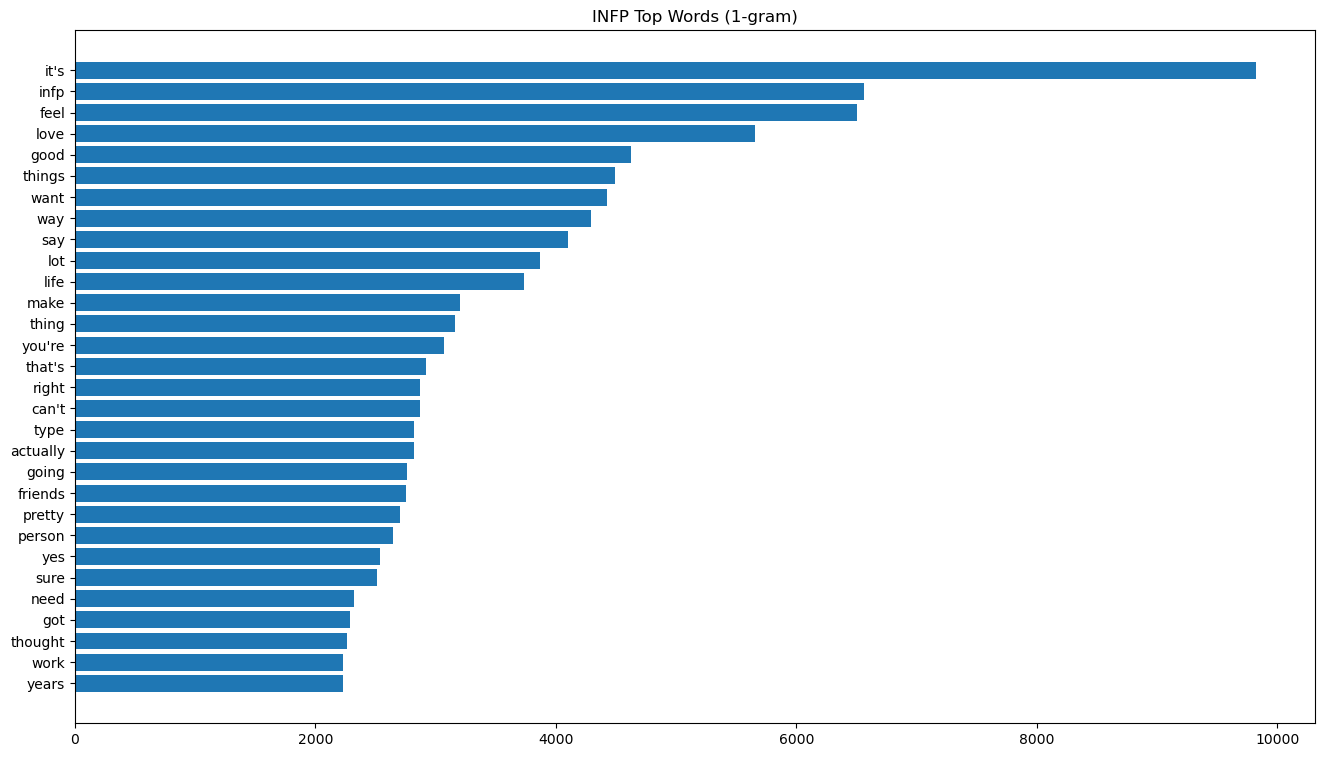

In [40]:
# Check top occuring 1-gram words for INFPs:
# Create word frequency dictionary:
posts_vec_1 = df_mbti[df_mbti['type'] == 'INFP']['processed_posts']
posts_vec_1 = cvec_1.fit_transform(posts_vec_1)
posts_vec_1_sum = np.asarray(posts_vec_1.sum(axis=0)).ravel()
count_dict = {word: posts_vec_1_sum[cvec_1.vocabulary_[word]] for word in cvec_1.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('INFP Top Words (1-gram)')

Text(0.5, 1.0, 'INFP Top Words (2-gram)')

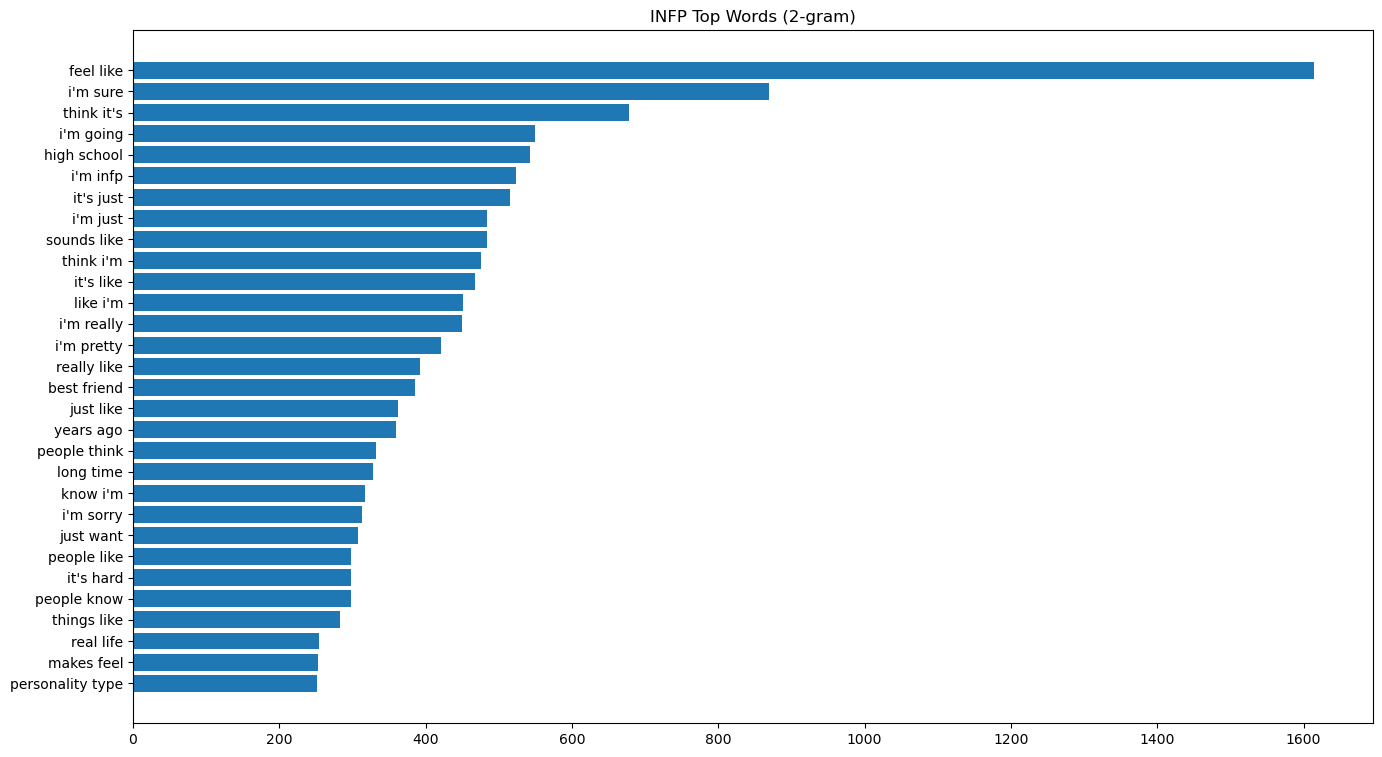

In [41]:
# Check top occuring 2-gram words for INFPs:
# Create word frequency dictionary:
posts_vec_2 = df_mbti[df_mbti['type'] == 'INFP']['processed_posts']
posts_vec_2 = cvec_2.fit_transform(posts_vec_2)
posts_vec_2_sum = np.asarray(posts_vec_2.sum(axis=0)).ravel()
count_dict = {word: posts_vec_2_sum[cvec_2.vocabulary_[word]] for word in cvec_2.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('INFP Top Words (2-gram)')

Text(0.5, 1.0, 'INFP Top Words (3-gram)')

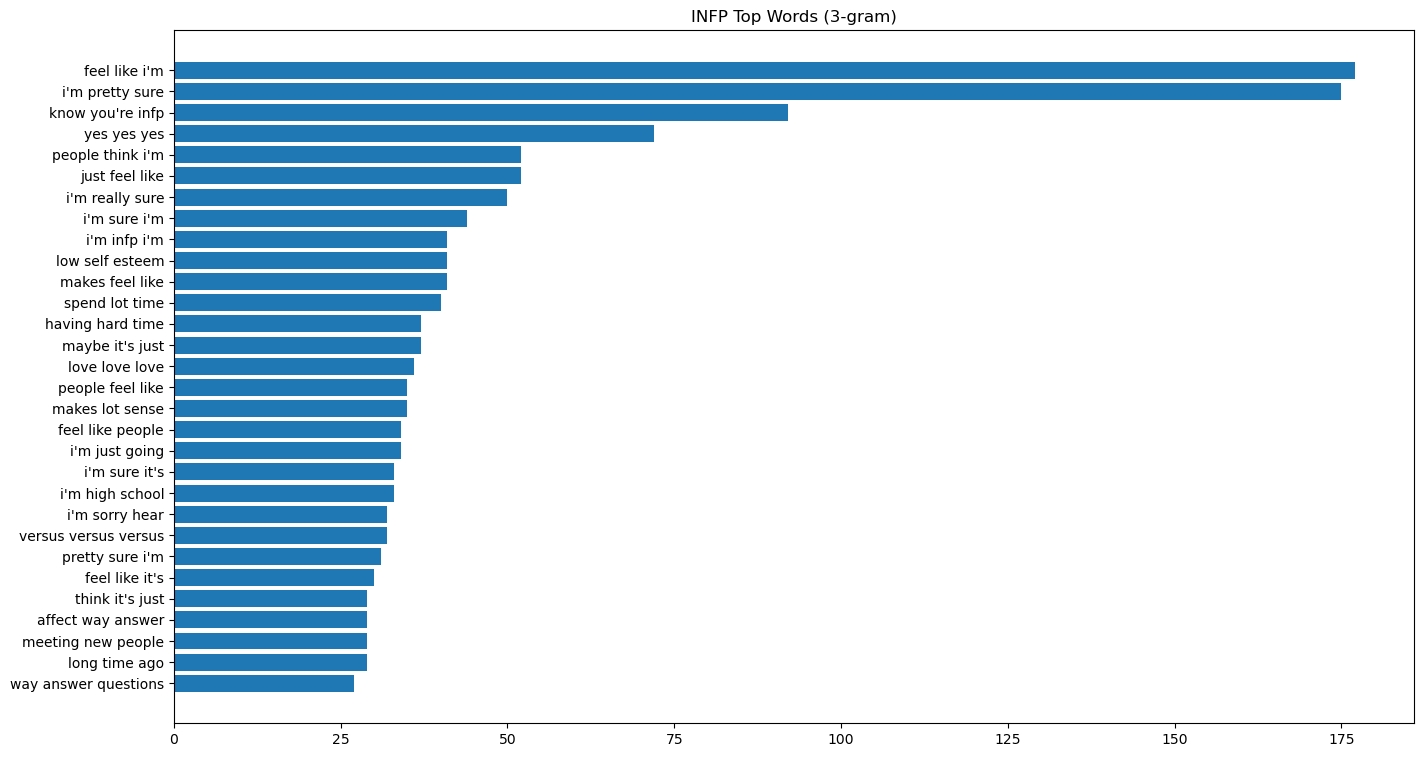

In [42]:
# Check top occuring 3-gram words for column INFPs:
# Create word frequency dictionary:
posts_vec_3 = df_mbti[df_mbti['type'] == 'INFP']['processed_posts']
posts_vec_3 = cvec_3.fit_transform(posts_vec_3)
posts_vec_3_sum = np.asarray(posts_vec_3.sum(axis=0)).ravel()
count_dict = {word: posts_vec_3_sum[cvec_3.vocabulary_[word]] for word in cvec_3.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('INFP Top Words (3-gram)')

Text(0.5, 1.0, 'INTJ Top Words (1-gram)')

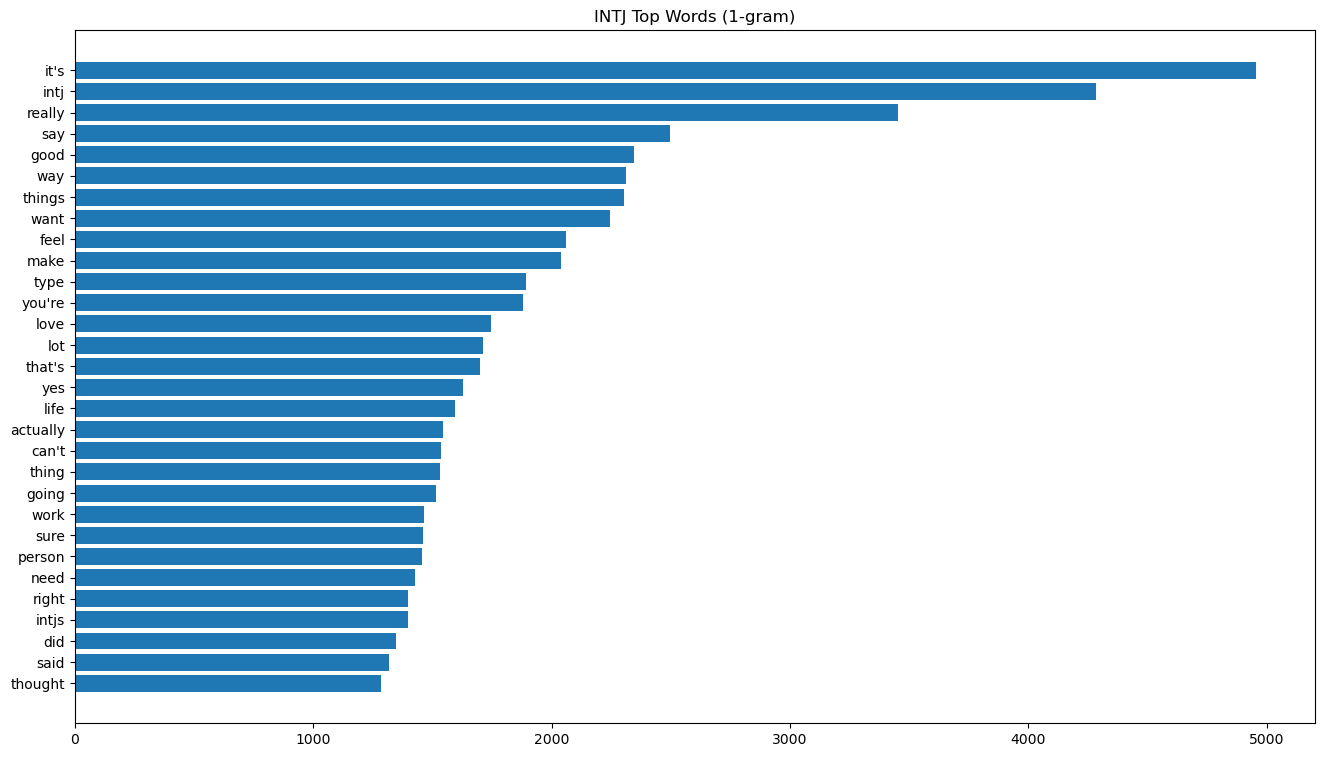

In [43]:
# Check top occuring 1-gram words for INFPs:
# Create word frequency dictionary:
posts_vec_1 = df_mbti[df_mbti['type'] == 'INTJ']['processed_posts']
posts_vec_1 = cvec_1.fit_transform(posts_vec_1)
posts_vec_1_sum = np.asarray(posts_vec_1.sum(axis=0)).ravel()
count_dict = {word: posts_vec_1_sum[cvec_1.vocabulary_[word]] for word in cvec_1.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('INTJ Top Words (1-gram)')

Text(0.5, 1.0, 'INTJ Top Words (2-gram)')

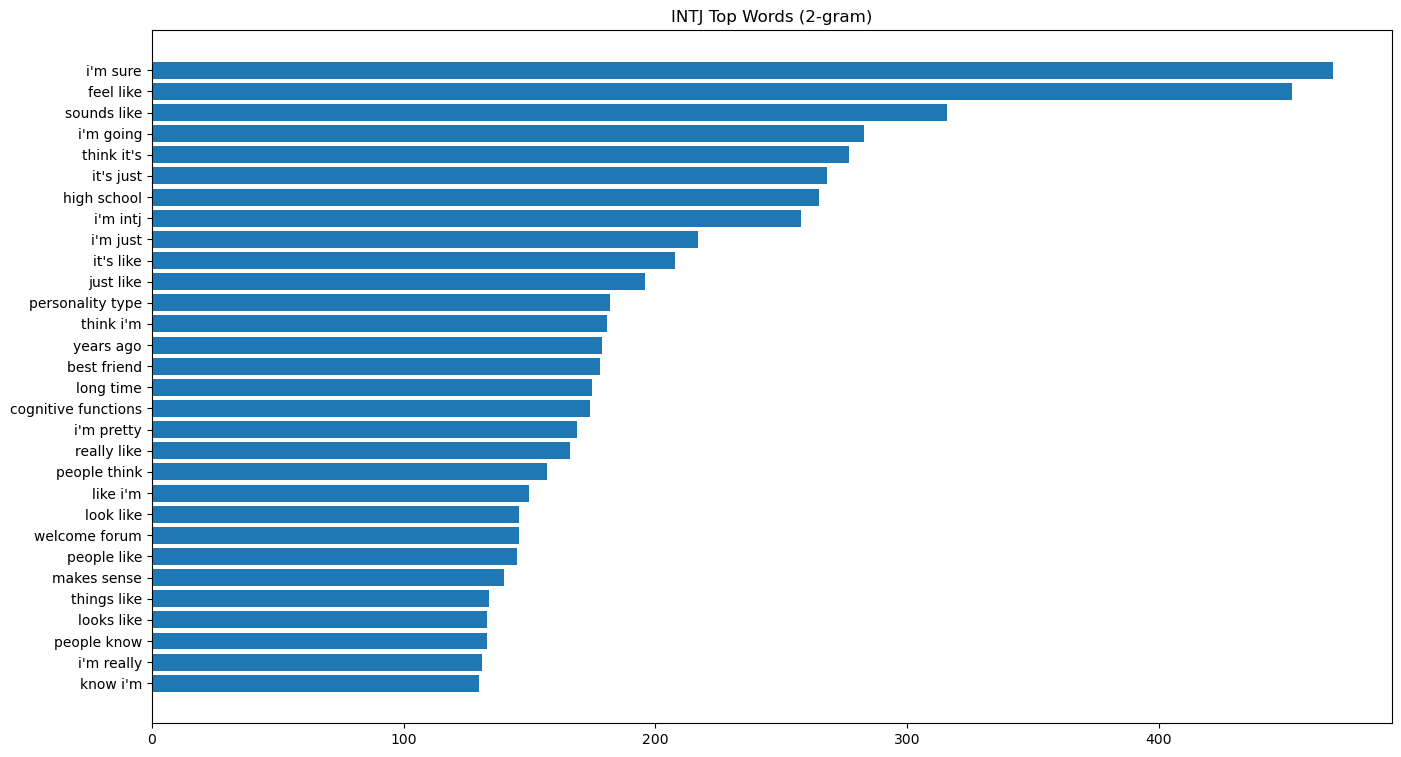

In [44]:
# Check top occuring 2-gram words for INTJs:
# Create word frequency dictionary:
posts_vec_2 = df_mbti[df_mbti['type'] == 'INTJ']['processed_posts']
posts_vec_2 = cvec_2.fit_transform(posts_vec_2)
posts_vec_2_sum = np.asarray(posts_vec_2.sum(axis=0)).ravel()
count_dict = {word: posts_vec_2_sum[cvec_2.vocabulary_[word]] for word in cvec_2.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('INTJ Top Words (2-gram)')

Text(0.5, 1.0, 'INTJ Top Words (3-gram)')

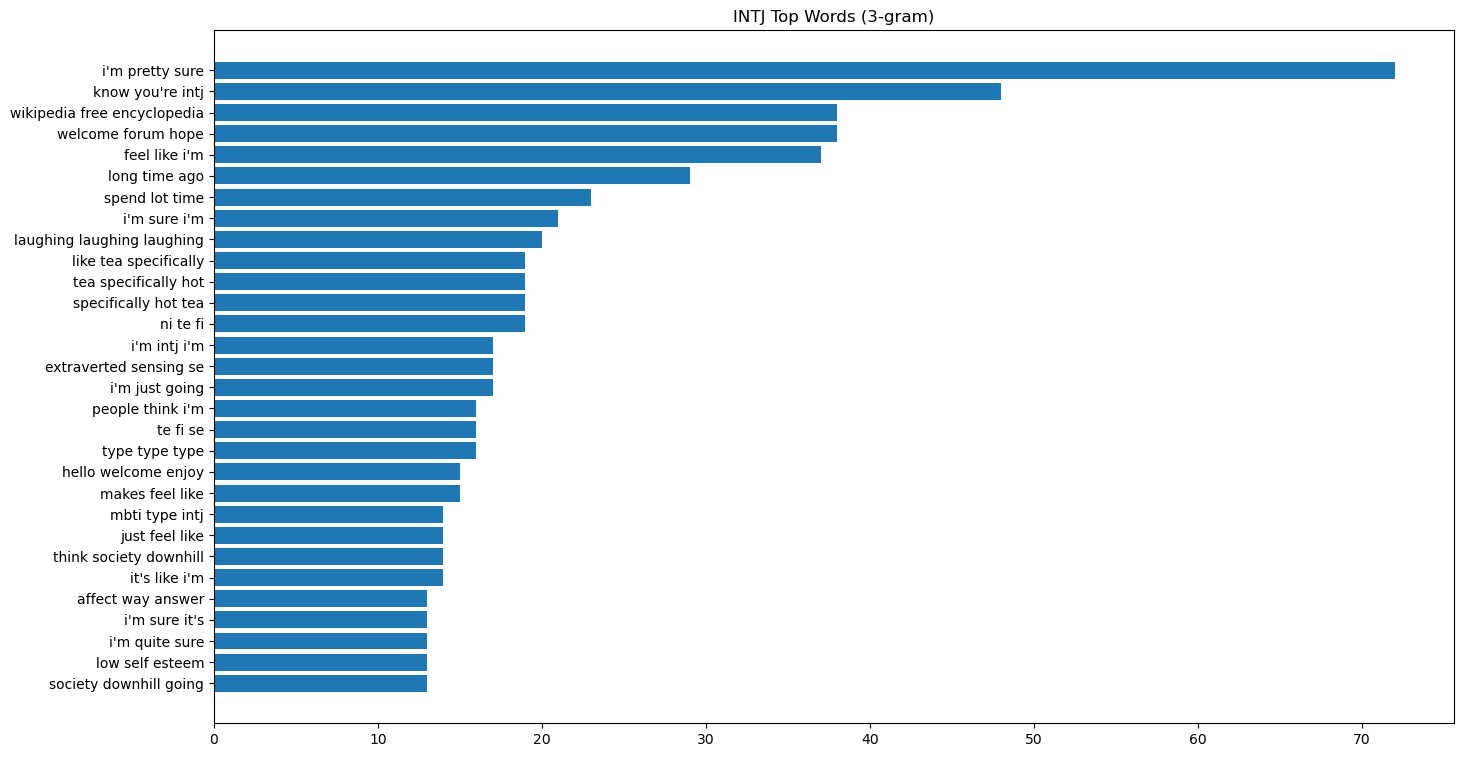

In [45]:
# Check top occuring 3-gram words for column INTJs:
# Create word frequency dictionary:
posts_vec_3 = df_mbti[df_mbti['type'] == 'INTJ']['processed_posts']
posts_vec_3 = cvec_3.fit_transform(posts_vec_3)
posts_vec_3_sum = np.asarray(posts_vec_3.sum(axis=0)).ravel()
count_dict = {word: posts_vec_3_sum[cvec_3.vocabulary_[word]] for word in cvec_3.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('INTJ Top Words (3-gram)')

Text(0.5, 1.0, 'ISTJ Top Words (2-gram)')

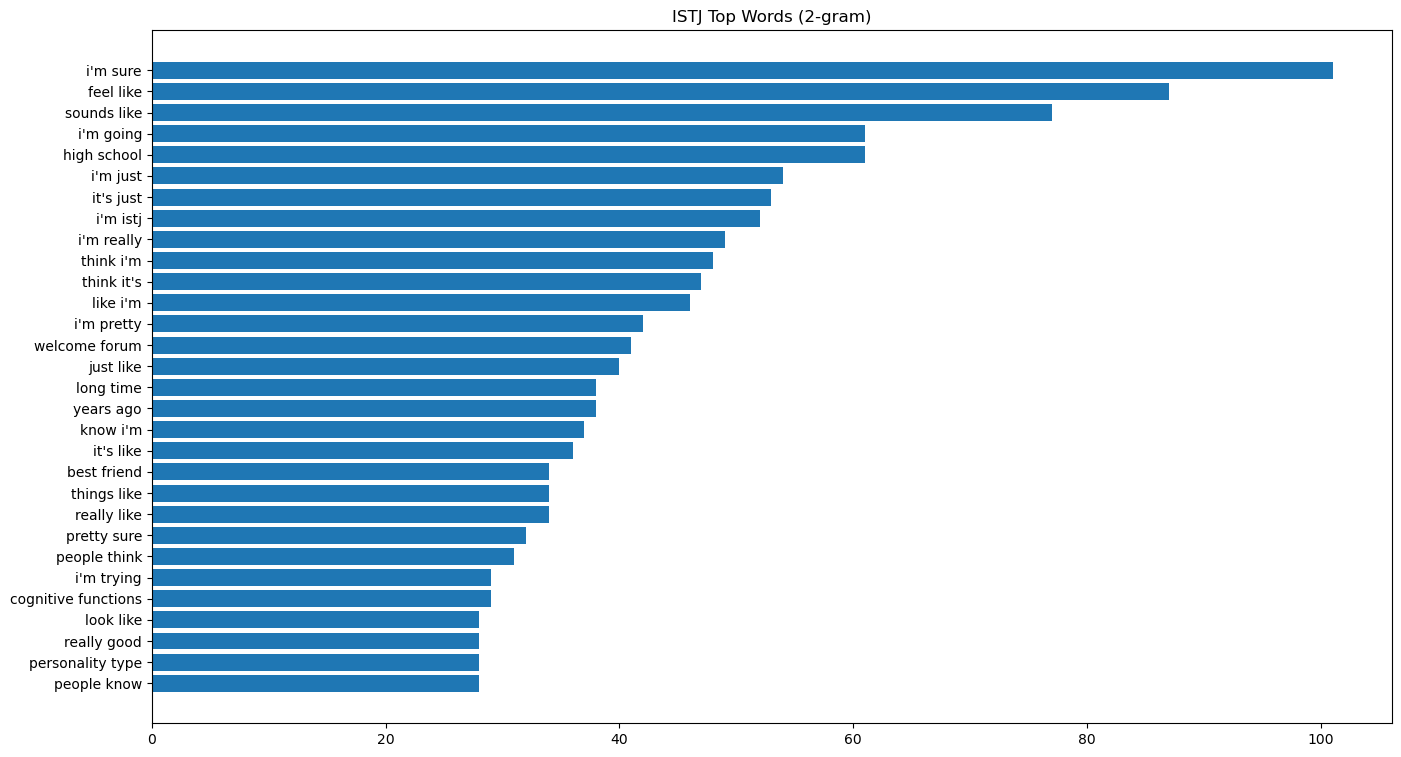

In [58]:
# Check top occuring 2-gram words for INTJs:
# Create word frequency dictionary:
posts_vec_2 = df_mbti[df_mbti['type'] == 'ISTJ']['processed_posts']
posts_vec_2 = cvec_2.fit_transform(posts_vec_2)
posts_vec_2_sum = np.asarray(posts_vec_2.sum(axis=0)).ravel()
count_dict = {word: posts_vec_2_sum[cvec_2.vocabulary_[word]] for word in cvec_2.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('ISTJ Top Words (2-gram)')

Text(0.5, 1.0, 'ISTJ Top Words (3-gram)')

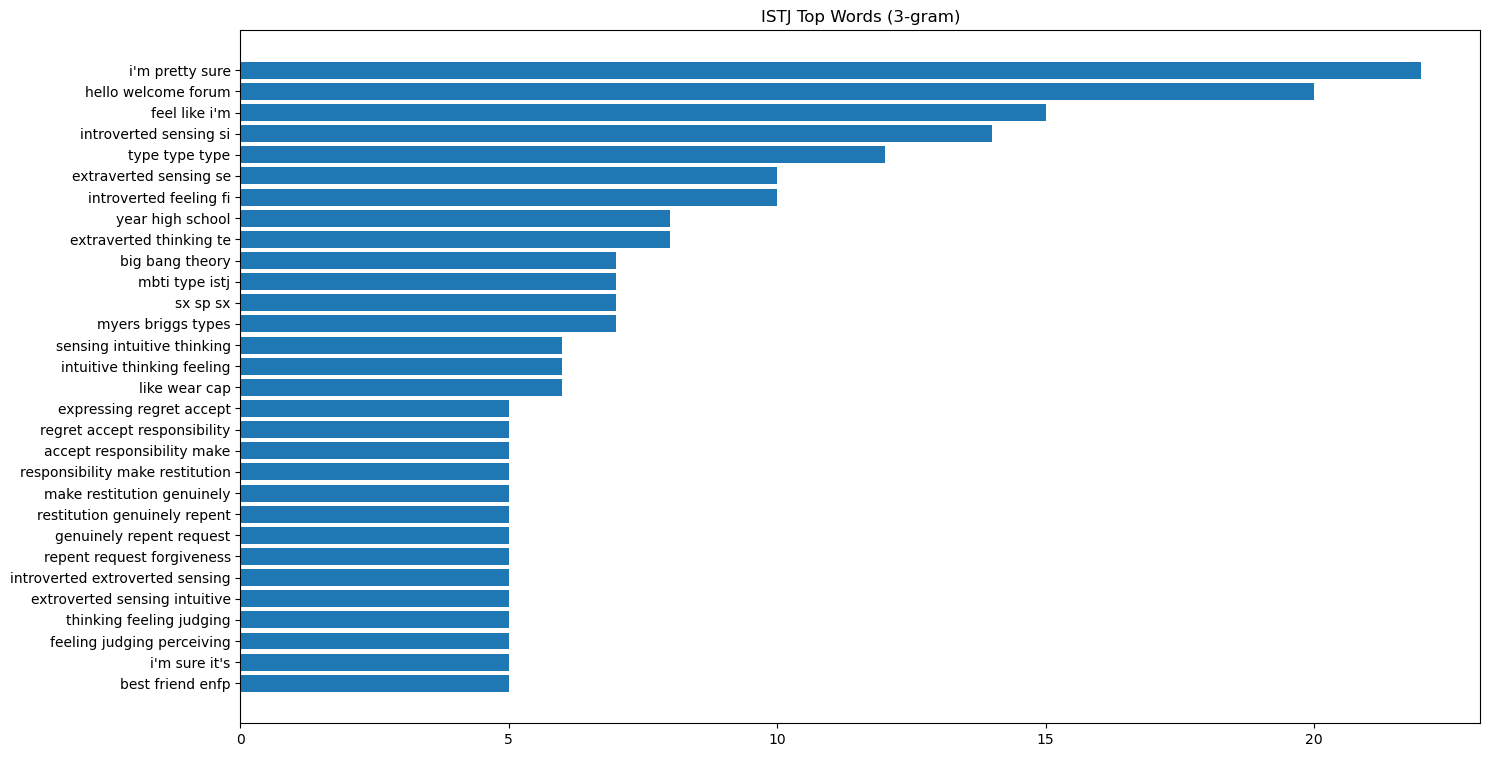

In [60]:
# Check top occuring 3-gram words for column INTJs:
# Create word frequency dictionary:
posts_vec_3 = df_mbti[df_mbti['type'] == 'ISTJ']['processed_posts']
posts_vec_3 = cvec_3.fit_transform(posts_vec_3)
posts_vec_3_sum = np.asarray(posts_vec_3.sum(axis=0)).ravel()
count_dict = {word: posts_vec_3_sum[cvec_3.vocabulary_[word]] for word in cvec_3.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('ISTJ Top Words (3-gram)')

<b> (b) Analyse Word Count per Row/ Input (containing 50 posts) </b>

In [47]:
# Create column 'posts_word_count' for column 'processed_posts' length:
df_mbti['posts_word_count'] = df_mbti['processed_posts'].str.strip().str.split(' ').str.len()


[Text(0.5, 1.0, 'Word Count'),
 Text(0.5, 0, 'MBTI Types'),
 Text(0, 0.5, 'Number of Words in 1 row')]

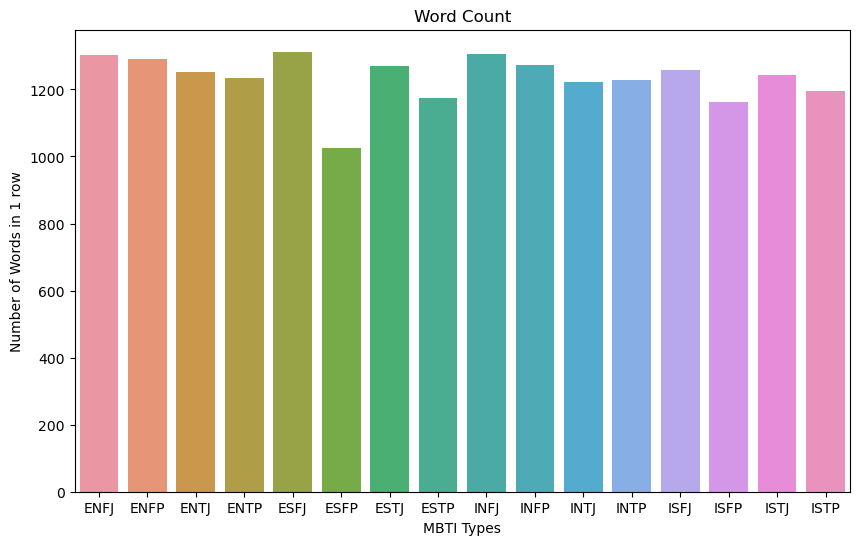

In [48]:
# plotting bar plot to see word count mean of each mbti
word_count = pd.DataFrame(df_mbti.groupby('type')[['posts_word_count']].mean())
word_count.reset_index(inplace=True)

plt.figure(figsize=(10, 6))

sns.barplot(word_count, x='type', y='posts_word_count').set(title='Word Count', xlabel='MBTI Types', ylabel='Number of Words in 1 row')

#### Part 5.2  For LinkedIn Dataset
<b> (a) Analyse Top Words </b>

Text(0.5, 1.0, 'Teacher Top Words (1-gram)')

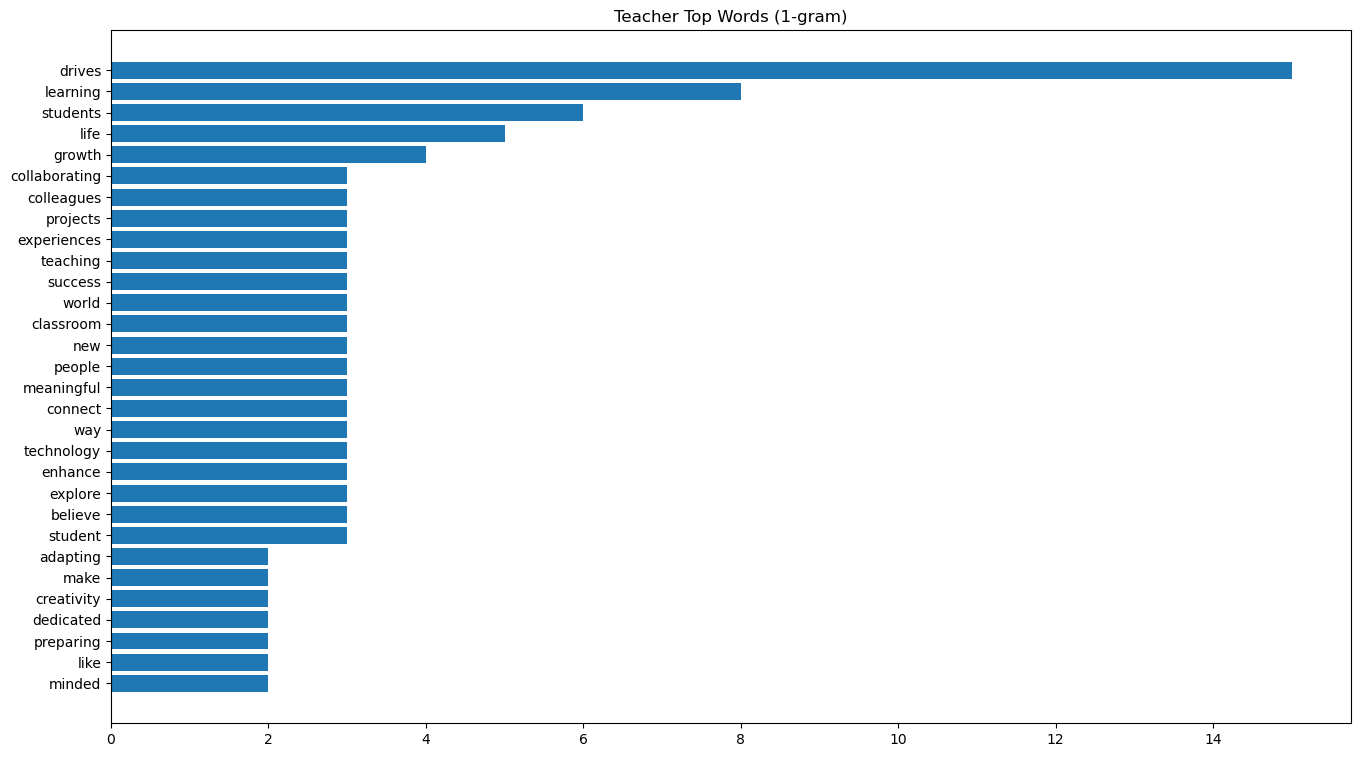

In [49]:
# Check top occuring 1-gram words for teacher:
# Create word frequency dictionary:
posts_vec_1 = df_linkedin[df_linkedin['job_title'] == 'tea']['processed_posts']
posts_vec_1 = cvec_1.fit_transform(posts_vec_1)
posts_vec_1_sum = np.asarray(posts_vec_1.sum(axis=0)).ravel()
count_dict = {word: posts_vec_1_sum[cvec_1.vocabulary_[word]] for word in cvec_1.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('Teacher Top Words (1-gram)')

Text(0.5, 1.0, 'Teacher Top Words (2-gram)')

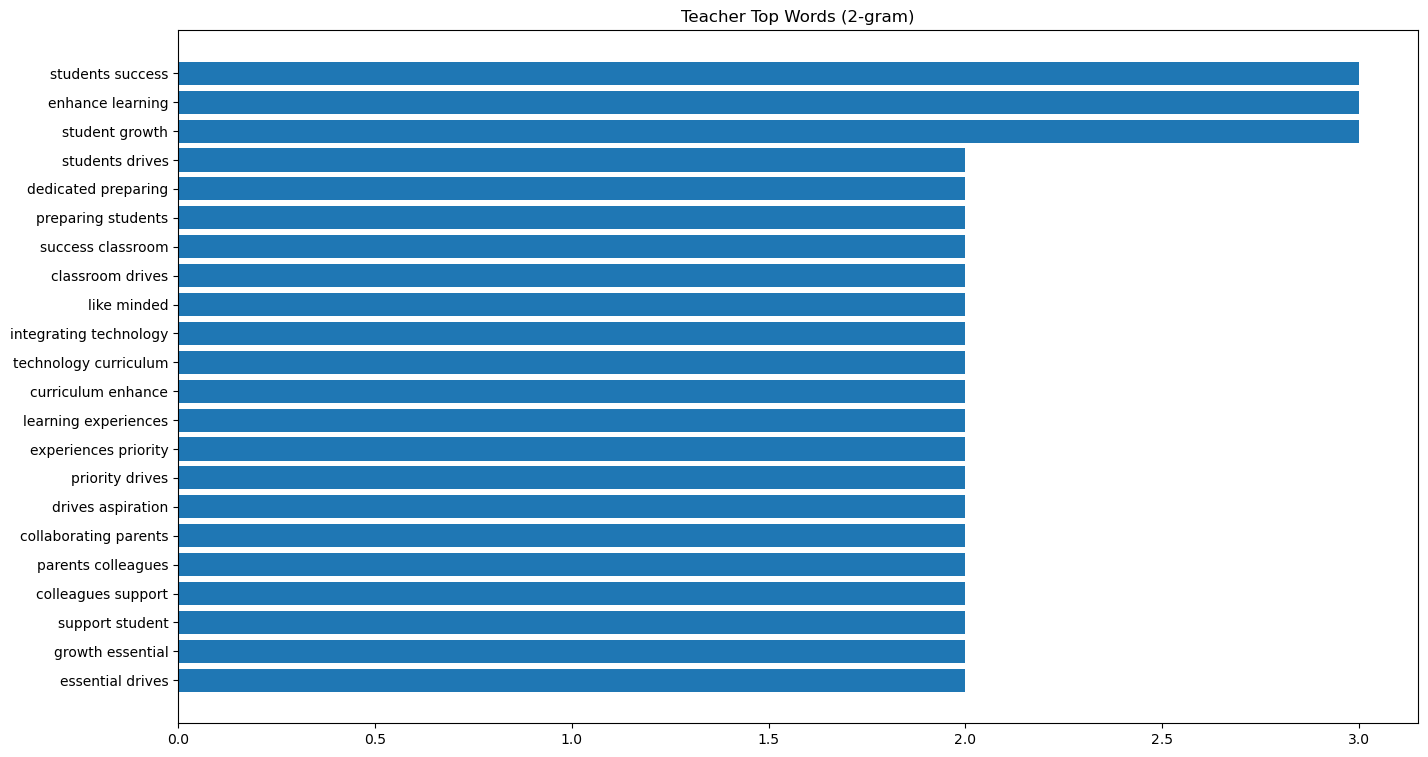

In [50]:
# Check top occuring 2-gram words for teacher:
# Create word frequency dictionary:
posts_vec_2 = df_linkedin[df_linkedin['job_title'] == 'tea']['processed_posts']
posts_vec_2 = cvec_2.fit_transform(posts_vec_2)
posts_vec_2_sum = np.asarray(posts_vec_2.sum(axis=0)).ravel()
count_dict = {word: posts_vec_2_sum[cvec_2.vocabulary_[word]] for word in cvec_2.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('Teacher Top Words (2-gram)')

Text(0.5, 1.0, 'Teacher Top Words (3-gram)')

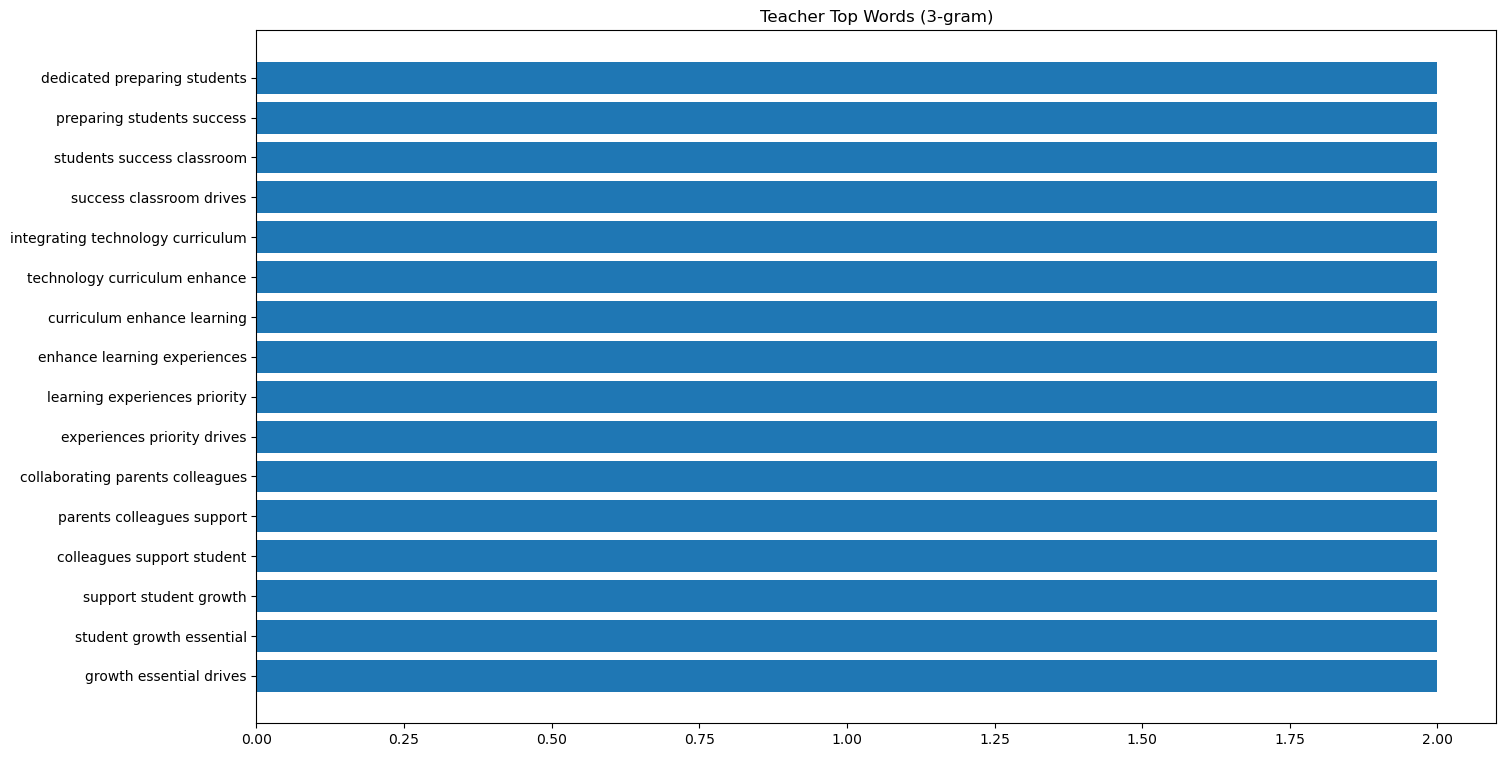

In [51]:
# Check top occuring 3-gram words for teacher:
# Create word frequency dictionary:
posts_vec_3 = df_linkedin[df_linkedin['job_title'] == 'tea']['processed_posts']
posts_vec_3 = cvec_3.fit_transform(posts_vec_3)
posts_vec_3_sum = np.asarray(posts_vec_3.sum(axis=0)).ravel()
count_dict = {word: posts_vec_3_sum[cvec_3.vocabulary_[word]] for word in cvec_3.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('Teacher Top Words (3-gram)')

Text(0.5, 1.0, 'Software Engineer Top Words (1-gram)')

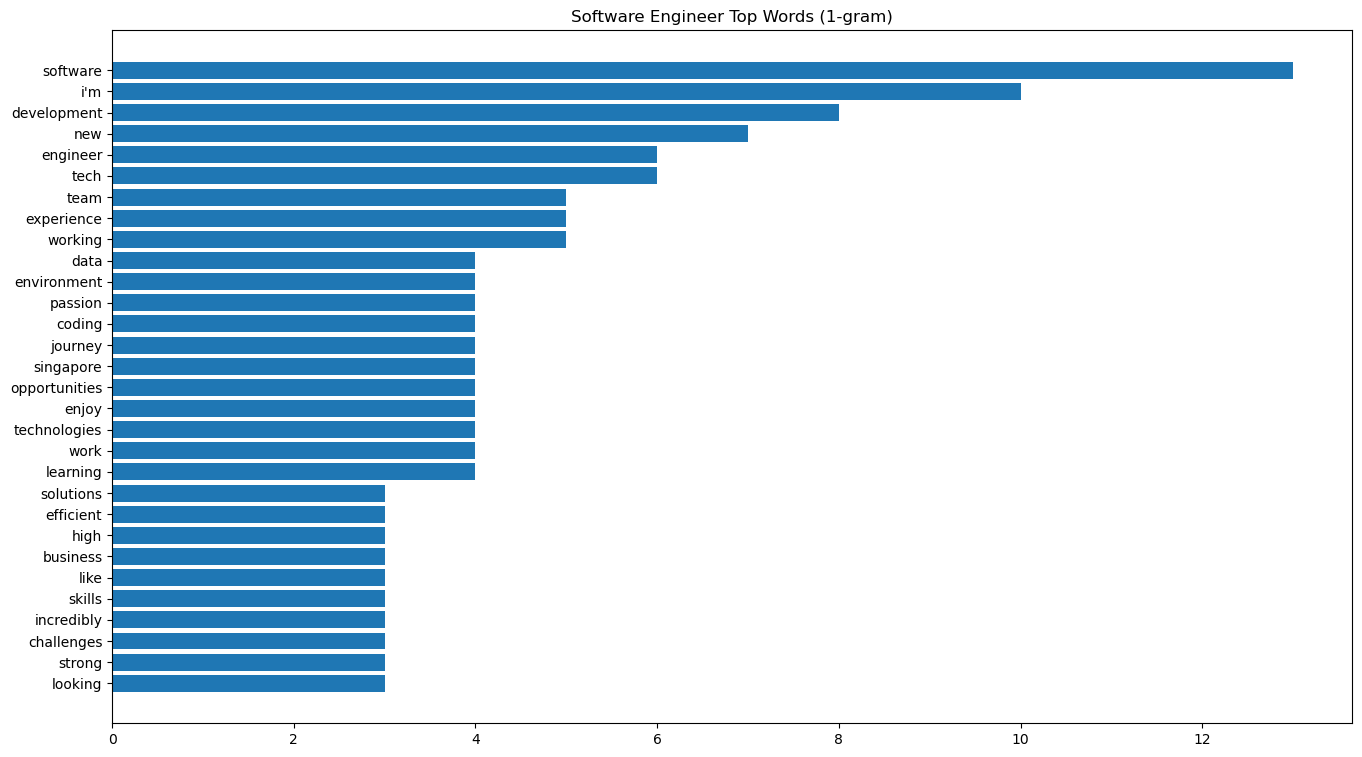

In [52]:
# Check top occuring 1-gram words for software engineer:
# Create word frequency dictionary:
posts_vec_1 = df_linkedin[df_linkedin['job_title'] == 'se']['processed_posts']
posts_vec_1 = cvec_1.fit_transform(posts_vec_1)
posts_vec_1_sum = np.asarray(posts_vec_1.sum(axis=0)).ravel()
count_dict = {word: posts_vec_1_sum[cvec_1.vocabulary_[word]] for word in cvec_1.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('Software Engineer Top Words (1-gram)')

Text(0.5, 1.0, 'Software Engineer Top Words (2-gram)')

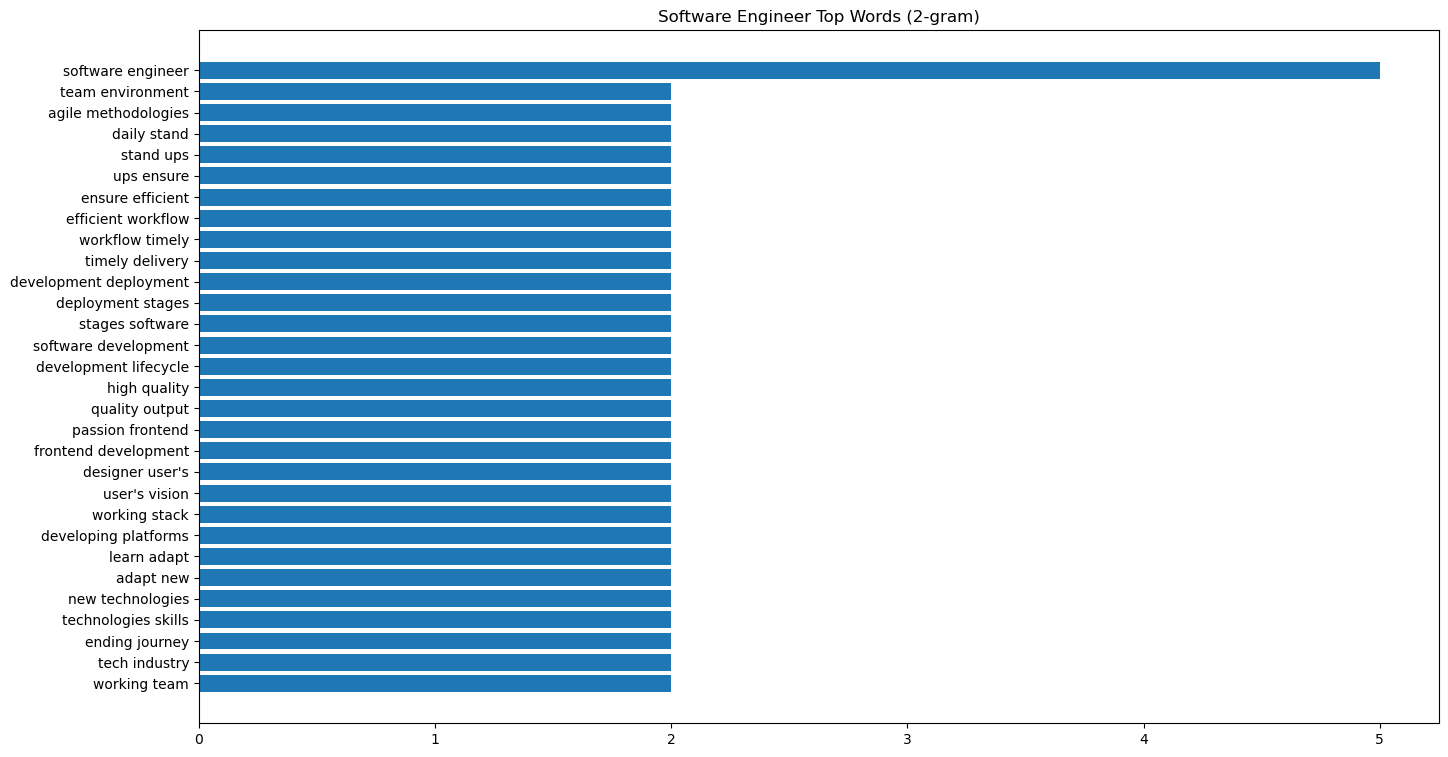

In [53]:
# Check top occuring 2-gram words for software engineers:
# Create word frequency dictionary:
posts_vec_2 = df_linkedin[df_linkedin['job_title'] == 'se']['processed_posts']
posts_vec_2 = cvec_2.fit_transform(posts_vec_2)
posts_vec_2_sum = np.asarray(posts_vec_2.sum(axis=0)).ravel()
count_dict = {word: posts_vec_2_sum[cvec_2.vocabulary_[word]] for word in cvec_2.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('Software Engineer Top Words (2-gram)')

Text(0.5, 1.0, 'Software Engineer Top Words (3-gram)')

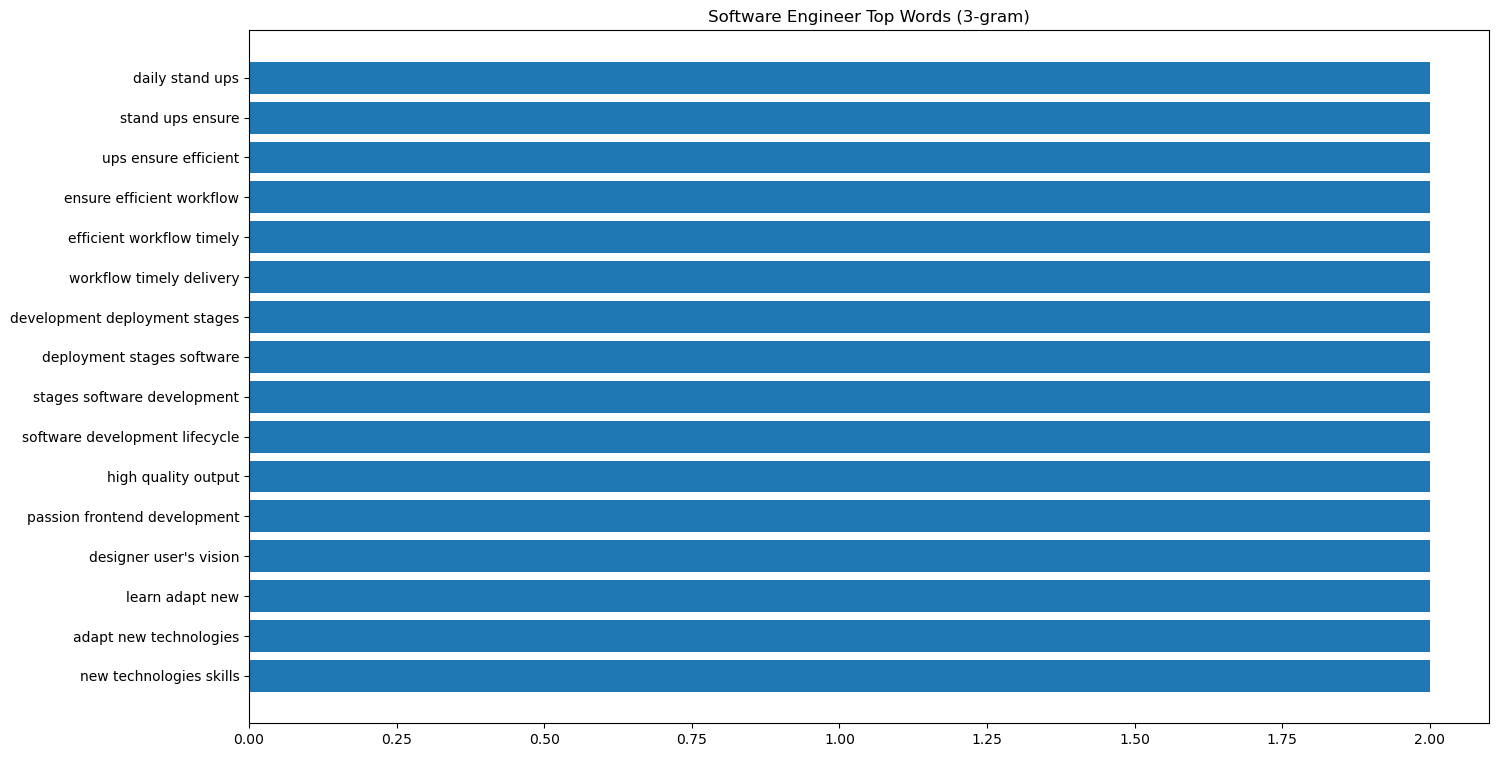

In [54]:
# Check top occuring 3-gram words for software engineer:
# Create word frequency dictionary:
posts_vec_3 = df_linkedin[df_linkedin['job_title'] == 'se']['processed_posts']
posts_vec_3 = cvec_3.fit_transform(posts_vec_3)
posts_vec_3_sum = np.asarray(posts_vec_3.sum(axis=0)).ravel()
count_dict = {word: posts_vec_3_sum[cvec_3.vocabulary_[word]] for word in cvec_3.vocabulary_}
sorted_dict = {key: value for key, value in sorted(count_dict.items(), key=lambda x: x[1], reverse=True)}

# Plot horizontal bar chart:
plt.figure(figsize=(16, 9))
plt.barh(y=list(sorted_dict.keys())[:30][::-1], width=list(sorted_dict.values())[:30][::-1])
plt.title('Software Engineer Top Words (3-gram)')

<b> (b) Analyse Word Count per Row/ Input </b>

In [55]:
# Create column 'posts_word_count' for column 'processed_posts' length:
df_linkedin['posts_word_count'] = df_linkedin['processed_posts'].str.strip().str.split(' ').str.len()

[Text(0.5, 1.0, 'Word Count'),
 Text(0.5, 0, 'Job Titles'),
 Text(0, 0.5, 'Number of Words in 1 row')]

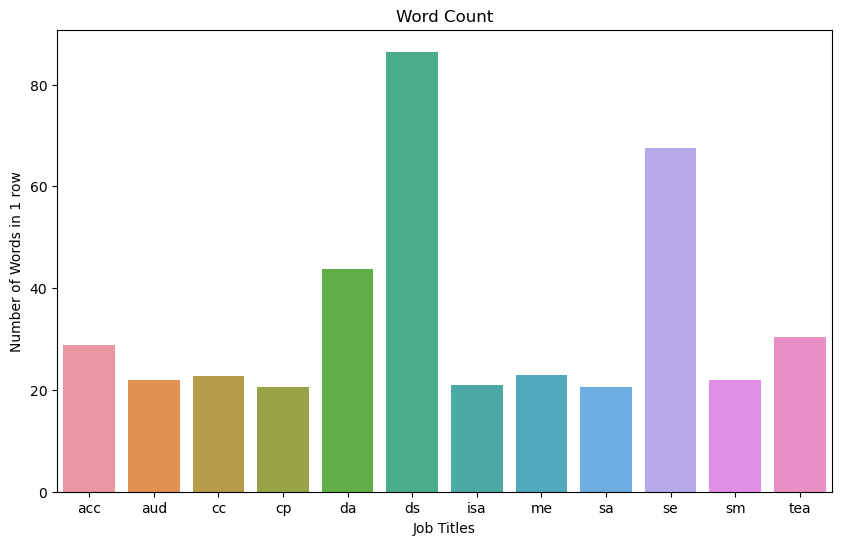

In [56]:
# plotting bar plot to see word count mean of each mbti
word_count = pd.DataFrame(df_linkedin.groupby('job_title')[['posts_word_count']].mean())
word_count.reset_index(inplace=True)

plt.figure(figsize=(10, 6))

sns.barplot(word_count, x='job_title', y='posts_word_count').set(title='Word Count', xlabel='Job Titles', ylabel='Number of Words in 1 row')